# Classification Neural Network

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

# Importing prepared dataset
import pickle
input = open('data_LogRegr.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [3]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [4]:

# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(13, activation = 'relu', input_dim = 13))

# Adding the output layer
cnn.add(Dense(8, activation = 'sigmoid'))

# Adding the output layer
cnn.add(Dense(4, activation = 'sigmoid'))

# Adding the output layer
cnn.add(Dense(1, activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
import sys
sys.setrecursionlimit(10000)

In [6]:
# Fitting the ANN to the Training set
history = cnn.fit(X_train, y_train, batch_size = 30, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
224/224 [==============================] - 1s 2ms/step - loss: 0.6946 - accuracy: 0.5409 - val_loss: 0.5857 - val_accuracy: 0.7357
Epoch 2/100
224/224 [==============================] - 0s 1ms/step - loss: 0.5467 - accuracy: 0.7497 - val_loss: 0.4835 - val_accuracy: 0.8220
Epoch 3/100
224/224 [==============================] - 0s 1ms/step - loss: 0.4634 - accuracy: 0.8223 - val_loss: 0.4152 - val_accuracy: 0.8482
Epoch 4/100
224/224 [==============================] - 0s 1ms/step - loss: 0.4207 - accuracy: 0.8304 - val_loss: 0.3855 - val_accuracy: 0.8500
Epoch 5/100
224/224 [==============================] - 0s 1ms/step - loss: 0.4014 - accuracy: 0.8301 - val_loss: 0.3727 - val_accuracy: 0.8440
Epoch 6/100
224/224 [==============================] - 0s 1ms/step - loss: 0.3903 - accuracy: 0.8304 - val_loss: 0.3641 - val_accuracy: 0.8435
Epoch 7/100
224/224 [==============================] - 0s 1ms/step - loss: 0.3823 - accuracy: 0.8327 - val_loss: 0.3579 - val_accuracy: 0.8464

Epoch 58/100
224/224 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8449 - val_loss: 0.3309 - val_accuracy: 0.8429
Epoch 59/100
224/224 [==============================] - 0s 1ms/step - loss: 0.3332 - accuracy: 0.8472 - val_loss: 0.3325 - val_accuracy: 0.8393
Epoch 60/100
224/224 [==============================] - 0s 1ms/step - loss: 0.3334 - accuracy: 0.8445 - val_loss: 0.3310 - val_accuracy: 0.8423
Epoch 61/100
224/224 [==============================] - 0s 1ms/step - loss: 0.3330 - accuracy: 0.8451 - val_loss: 0.3316 - val_accuracy: 0.8417
Epoch 62/100
224/224 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.8458 - val_loss: 0.3328 - val_accuracy: 0.8440
Epoch 63/100
224/224 [==============================] - 0s 1ms/step - loss: 0.3328 - accuracy: 0.8446 - val_loss: 0.3322 - val_accuracy: 0.8411
Epoch 64/100
224/224 [==============================] - 0s 1ms/step - loss: 0.3331 - accuracy: 0.8446 - val_loss: 0.3312 - val_accuracy:

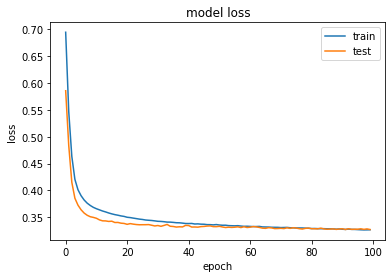

In [7]:
# Plotting loss & accuracy
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [8]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.6)

In [9]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1117   75]
 [ 183  305]]


Итак, построена Нейронная Сеть для модели классификации. Был проведен ряд экспериментов с множеством параметров, таких как: количество слоев, число batch_size, порог отсечения. 
1. Оптимальное количество слоев - 3 (на 2 слоях примерно на 10 обьектов больше неверно распознаются)
2. batch_size изменялось от 8 до 60, однако оптимальным является 30. Остальные случаи уменьшают верное распознавание от 2 до 10-15 обьектов.
3. Порог отсичения - оптимальное значение при y_pred > 0.6. Этот параметр наибольшим образом влияет на правильность распознавания обьектов и при изменении на 0,1 - до 30 обьектов могут быть неверно распознаны.

Таким образом, в данной моделе при оптимальных параметрах неверно распознано 258 обьектов. Модель пригодна для использования и выполняет качественно классификационную задачу.
А так же наибольшее число бедных людей распознано верно (1117) и наименьший показатель по неверно распознанным - 75 человека в сравнении с другими моделями. Поэтому получен на данном этапе лучший результат.